<a href="https://colab.research.google.com/github/zinebzannouti/AWS-Breast-Cancer-Prediction/blob/main/Capstone%20Project/Capstone_Project_avec_trou_de_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Étapes générales d'exploration pour les données catégorielles**
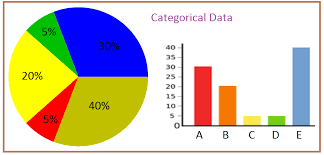
- Dans cette section, vous vous concentrerez sur le traitement des entités catégorielles dans le jeu de pnwflights14données, mais vous pouvez appliquer la même procédure à tous les types de jeux de données.
- pnwflights14est une version modifiée de l'ensemble de nycflights13données de Hadley Wickham et contient des informations sur tous les vols au départ des deux principaux aéroports du nord-ouest du Pacifique (PNW), SEA à Seattle et PDX à Portland, en 2014 : 162 049 vols au total.

- Pour aider à comprendre les causes des retards, il comprend également un certain nombre d'autres ensembles de données utiles :

- weather: les données météorologiques horaires de chaque aéroport
- planes: informations constructeur sur chaque avion
- airports: noms et emplacements des aéroports
- airlines: traduction entre deux codes et noms de facteur

- Puisqu'il est toujours bon de comprendre avant de commencer à travailler dessus, vous explorerez brièvement les données !
- Pour ce faire, vous allez d'abord importer les bibliothèques de base que vous utiliserez tout au long du didacticiel, à savoir pandas, numpyet copy.

- Assurez-vous également que vous définissez Matplotlib pour tracer en ligne, ce qui signifie que le tracé généré apparaîtra immédiatement sous chaque cellule de code.

In [2]:
import pandas as pd
import numpy as np
import copy
%matplotlib inline

- Ensuite, vous lirez l'ensemble de données flights dans un pandas DataFrame avec read_csv()et vérifierez le contenu avec la .head()méthode.

In [3]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
#Afficher le contenu du datafreme avec la méthode .head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


- Comme vous le remarquerez probablement, le DataFrame ci-dessus contient toutes sortes d'informations sur les vols comme l'année, le retard de départ, l'heure d'arrivée, le transporteur, la destination, etc.

- L'étape suivante consiste à rassembler des informations sur les différentes colonnes de votre DataFrame. Vous pouvez le faire en utilisant .info(), qui vous donne essentiellement des informations sur le nombre de lignes, de colonnes, de types de données de colonne, d'utilisation de la mémoire, etc.

In [7]:
#fill_here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


- Comme vous pouvez le voir, les colonnes comme year, monthet daysont lues comme des entiers, et dep_time, dep_delayetc. sont lues comme des flottants.

- Les colonnes avec objet dtypesont les caractéristiques catégorielles possibles dans votre jeu de données.

- La raison pour laquelle vous diriez que ces caractéristiques catégorielles sont "possibles" est parce que vous ne devriez pas vous fier complètement .info()pour obtenir le type de données réel des valeurs d'une caractéristique, car certaines valeurs manquantes qui sont représentées sous forme de chaînes dans une caractéristique continue peut le contraindre à les lire comme objectdtypes.

- C'est pourquoi c'est toujours une bonne idée d'examiner minutieusement votre ensemble de données brutes, puis de penser à le nettoyer.

- L'un des moyens les plus courants d'analyser la relation entre une caractéristique catégorique et une caractéristique continue consiste à tracer une boîte à moustaches. 
- La boîte à moustaches est un moyen simple de représenter des données statistiques sur un graphique dans lequel un rectangle est dessiné pour représenter les deuxième et troisième quartiles, généralement avec une ligne verticale à l'intérieur pour indiquer la valeur médiane.
- Les quartiles inférieur et supérieur sont représentés par des lignes horizontales de part et d'autre du rectangle.

- Vous pouvez tracer un boxplot en .boxplot()appelant sur votre DataFrame. Ici, vous allez tracer une boîte à moustaches de la dep_timecolonne par rapport aux deux originvols de PDXet SEA.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


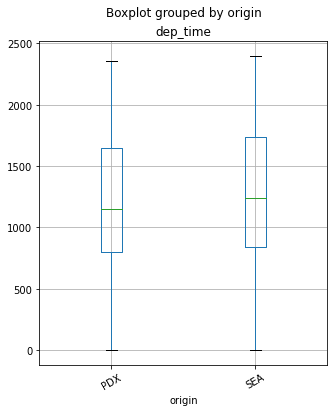

In [8]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

- Comme vous ne traiterez que des fonctionnalités catégorielles dans ce didacticiel, il est préférable de les filtrer.
- Vous pouvez créer un DataFrame distinct composé uniquement de ces fonctionnalités en exécutant la commande suivante.
- La méthode .copy()est utilisée ici afin que les modifications apportées dans le nouveau DataFrame ne soient pas reflétées dans l'original.


In [9]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

In [10]:
#Afficher le contenu du datafreme cat_df_flights avec la méthode .head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


- L'une des étapes de prétraitement des données les plus courantes consiste à vérifier les valeurs nulles dans l'ensemble de données.
- Vous pouvez obtenir le nombre total de valeurs manquantes dans le DataFrame à l'aide du code de ligne suivant :

In [11]:
#fill_here

248


In [12]:
#fill_here

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


- Il semble que seule la tailnumcolonne ait des valeurs nulles. Vous pouvez effectuer une imputation de mode pour ces valeurs nulles.
- La fonction fillna()est pratique pour de telles opérations.

- Notez le chaînage de la méthode .value_counts()dans le code ci-dessous.
- Cela renvoie la distribution de fréquence de chaque catégorie dans l'entité, puis sélectionne la catégorie supérieure, qui est le mode, avec l' .indexattribut.

In [13]:
#fill_here

- Vérifions que le nombre de valeurs nulles après l'imputation devrait donner un nombre nul.

In [14]:
#fill_here

0


- Une autre étape d'analyse exploratoire des données (EDA) que vous pouvez effectuer sur les entités catégorielles est la distribution de fréquence des catégories au sein de l'entité, qui peut être effectuée avec la .value_counts()méthode décrite précédemment.

In [15]:
print(cat_df_flights['carrier'].value_counts())

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


- Pour connaître le nombre de catégories distinctes au sein de la fonctionnalité, vous pouvez enchaîner le code précédent avec la .count()méthode :Pour connaître le nombre de catégories distinctes au sein de la fonctionnalité, vous pouvez enchaîner le code précédent avec la .count()méthode :

In [16]:
#fill_here

11


- L'exploration visuelle est le moyen le plus efficace d'extraire des informations entre les variables.

- Vous trouverez ci-dessous un modèle de base pour tracer un graphique à barres de la distribution de fréquence d'une caractéristique catégorique à l'aide du seabornpackage, qui montre la distribution de fréquence de la carriercolonne. 
- Vous pouvez jouer avec différents arguments pour changer l'apparence de l'intrigue.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


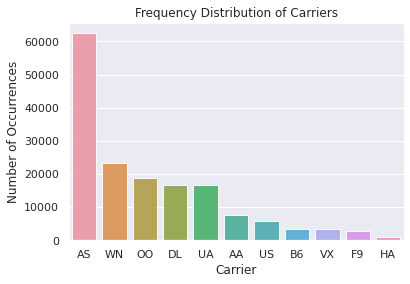

In [17]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

- De même, vous pouvez tracer un graphique à secteurs avec la matplotlibbibliothèque pour obtenir les mêmes informations. La labelsliste ci-dessous contient les noms de catégories de la carriercolonne :

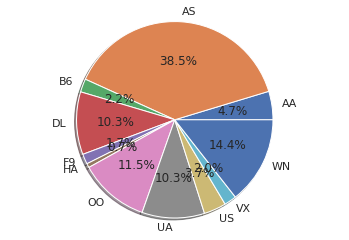

In [18]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# **Encodage des données catégorielles**
- Vous allez maintenant apprendre différentes techniques pour coder les caractéristiques catégorielles en quantités numériques.
- Pour faire simple, vous appliquerez ces méthodes d'encodage uniquement sur la carriercolonne.
- Cependant, la même approche peut être étendue à toutes les colonnes.

- Les techniques que vous couvrirez sont les suivantes :

    - Remplacement des valeurs
    - Encodage des étiquettes
    - Encodage One-Hot
    - Encodage binaire



# **Remplacer les valeurs**
- Commençons par la méthode la plus basique, qui consiste simplement à remplacer les catégories par les nombres souhaités. 
- Ceci peut être réalisé à l'aide de la replace()fonction dans pandas.
- L'idée est que vous avez la liberté de choisir les numéros que vous souhaitez attribuer aux catégories en fonction du cas d'utilisation commerciale.

- Vous allez maintenant créer un dictionnaire qui contient des numéros de mappage pour chaque catégorie dans la carriercolonne :

In [19]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}


- **Notez** que la définition d'un mappage via un dictionnaire codé en dur est facile lorsque le nombre de catégories est faible, comme dans ce cas qui est de 11.
- Vous pouvez obtenir le même mappage à l'aide des compréhensions du dictionnaire, comme indiqué ci-dessous.
- Cela sera utile lorsque le nombre de catégories est élevé et que vous ne souhaitez pas taper chaque mappage.
- Vous stockerez les noms de catégorie dans une liste appelée labels, puis zipen une séquence de nombres et parcourrez-la.

In [20]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)


{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


- Tout au long de ce didacticiel, vous ferez une copie de l'ensemble de données via la .copy()méthode pour pratiquer chaque technique d'encodage afin de vous assurer que le DataFrame d'origine reste intact et que les modifications que vous apportez ne se produisent que dans celui copié.

In [21]:
cat_df_flights_replace = #fill_here


- Utilisez la replace()fonction sur le DataFrame en passant le dictionnaire de mappage comme argument :

In [22]:
cat_df_flights_replace.#fill_here

print(#Afficher le contenu du datafreme cat_df_flights_replace avec la méthode .head())


   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


- Comme vous pouvez le constater, vous avez encodé les catégories avec les numéros mappés dans votre DataFrame.

- Vous pouvez également vérifier le dtype de la colonne nouvellement encodée, qui est maintenant convertie en nombres entiers.

In [23]:
print(cat_df_flights_replace['carrier'].dtypes)


int64


- **Astuce :** en Python, c'est une bonne pratique de transtyper les fonctionnalités catégorielles en a category dtypecar elles rendent les opérations sur ces colonnes beaucoup plus rapides que le objectdtype. Vous pouvez effectuer le transtypage en utilisant la .astype()méthode sur vos colonnes comme indiqué ci-dessous :

In [24]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)


carrier    category
tailnum      object
origin     category
dest         object
dtype: object


- Vous pouvez valider le fonctionnement plus rapide du categorydtype en chronométrant le temps d'exécution de la même opération effectuée sur un DataFrame avec des colonnes comme categorydtype et objectdtype en utilisant la timebibliothèque.

- Supposons que vous souhaitiez calculer le nombre de vols pour chacun à carrierpartir de chaque originlieu, vous pouvez utiliser les méthodes .groupby()et .count()sur votre DataFrame pour le faire.

In [25]:
import time
%timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns


43.7 ms ± 704 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns


27.8 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


- Notez que le DataFrame avec category dtypeest beaucoup plus rapide.

# **Encodage des étiquettes**
- Une autre approche consiste à encoder les valeurs catégorielles avec une technique appelée "encodage d'étiquettes", qui vous permet de convertir chaque valeur d'une colonne en un nombre.
- Les étiquettes numériques sont toujours comprises entre 0 et n_categories-1.

- Vous pouvez effectuer un encodage d'étiquette via des attributs .cat.codes sur la colonne de votre DataFrame.

In [27]:
cat_df_flights_lc['carrier'] = #fill_here

In [28]:
cat_df_flights_lc.head() #alphabetically labeled from 0 to 10


,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


- Parfois, vous voudrez peut-être simplement coder un groupe de catégories au sein d'une entité avec une valeur numérique et coder toutes les autres catégories avec une autre valeur numérique.

- Vous pouvez le faire en utilisant numpyla where()fonction de comme indiqué ci-dessous.
- Vous encoderez tous les USvols transporteurs en valeur 1et les autres transporteurs en valeur 0.
- Cela créera une nouvelle colonne dans votre DataFrame avec les encodages. Plus tard, si vous souhaitez supprimer la colonne d'origine, vous pouvez le faire en utilisant la drop()fonction dans pandas.

In [29]:
cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()


,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


- Vous pouvez obtenir le même encodage d'étiquette en utilisant scikit-learn's LabelEncoder:

In [30]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df


,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


- L'encodage des étiquettes est assez intuitif et simple et peut vous donner une bonne performance de votre algorithme d'apprentissage, mais il a comme inconvénient que les valeurs numériques peuvent être mal interprétées par l'algorithme.
- Faut-il donner au porteur US(encodé en 8) 8 fois plus de poids qu'au porteur AS(encodé en 1) ?

- Pour résoudre ce problème, il existe un autre moyen populaire d'encoder les catégories via quelque chose appelé encodage one hot.

# **Encodage One-Hot**
- La stratégie de base consiste à convertir chaque valeur de catégorie dans une nouvelle colonne et à attribuer une valeur 1ou 0(Vrai/Faux) à la colonne. 
- Cela a l'avantage de ne pas pondérer une valeur de manière incorrecte.

- Il existe de nombreuses bibliothèques qui prennent en charge l'encodage à chaud, mais la plus simple utilise la méthode pandas' .get_dummies().

- Cette fonction est nommée ainsi car elle crée des variables factices/indicatrices (1 ou 0).
- Il y a principalement trois arguments importants ici, le premier est le DataFrame sur lequel vous voulez encoder, le deuxième étant l' columnsargument qui vous permet de spécifier les colonnes sur lesquelles vous voulez faire l'encodage, et le troisième, l' prefixargument qui vous permet de spécifier le préfixe pour le nouvelles colonnes qui seront créées après l'encodage.

In [31]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = #get_dummies method with carrier column 

print(cat_df_flights_onehot.head())


  tailnum origin dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0  N508AS    PDX  ANC           0           1           0           0   
1  N195UW    SEA  CLT           0           0           0           0   
2  N37422    PDX  IAH           0           0           0           0   
3  N547UW    PDX  CLT           0           0           0           0   
4  N762AS    SEA  ANC           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0           0   
3           0           0           0           0           1           0   
4           0           0           0           0           0           0   

   carrier_WN  
0           0  
1           0  
2           0  
3           0  
4           0  


- Comme vous pouvez le voir, la colonne carrier_ASobtient une valeur 1aux 0e et 4e points d'observation car ces points avaient la AScatégorie étiquetée dans le DataFrame d'origine. De même pour les autres colonnes également.

- scikit-learn prend également en charge un encodage à chaud via LabelBinarizeret OneHotEncoderdans son preprocessingmodule (consultez les détails ici ).
- Juste pour le plaisir de vous entraîner vous ferez le même encodage via LabelBinarizer:

In [32]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.#fill_here
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())


   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


- Notez que cela lb_results_dfa abouti à un nouveau DataFrame avec uniquement les encodages à chaud pour la fonctionnalité carrier. Cela doit être concaténé avec le DataFrame d'origine, ce qui peut être fait via la méthode pandas' . .concat()L' argument est défini sur la valeur axis 1 que vous souhaitez fusionner sur les colonnes.

In [33]:
result_df = pd.concat(#fill_here)

print(result_df.head())


  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0


# **Encodage binaire**
- Cette technique n'est pas aussi intuitive que les précédentes. Dans cette technique, les catégories sont d'abord codées en ordinal, puis ces entiers sont convertis en code binaire, puis les chiffres de cette chaîne binaire sont divisés en colonnes séparées.
- Cela encode les données dans moins de dimensions que one-hot.

- Vous pouvez effectuer un encodage binaire de plusieurs manières, mais la plus simple consiste à utiliser la category_encodersbibliothèque.


- Vous devez d'abord importer la category_encodersbibliothèque après l'avoir installée. 
- Appelez la BinaryEncoderfonction en spécifiant les colonnes que vous souhaitez encoder, puis appelez la .fit_transform()méthode dessus avec le DataFrame comme argument.

In [35]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.7 MB/s eta 0:00:00


In [36]:
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()

,carrier_0,carrier_1,carrier_2,carrier_3,tailnum,origin,dest
0,0,0,0,1,N508AS,PDX,ANC
1,0,0,1,0,N195UW,SEA,CLT
2,0,0,1,1,N37422,PDX,IAH
3,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,1,N762AS,SEA,ANC


- **Notez** que quatre nouvelles colonnes sont créées à la place de la carriercolonne avec un codage binaire pour chaque catégorie de la fonctionnalité.

- **Notez** qu'il category_encoderss'agit d'une bibliothèque très utile pour encoder les colonnes catégorielles.
- Non seulement il prend en charge l'encodage one-hot, binaire et d'étiquette, mais également d'autres méthodes d'encodage avancées telles que le contraste Helmert, le contraste polynomial, la différence arrière, etc.